## Pracitca 2 "Tipología y ciclo de vida de los datos "

### Autor : Mohamed Azar

###2. Resolución
####2.1. Descripción del dataset

El conjunto de datos objeto de análisis se ha obtenido a partir de este enlace en Kaggle y  contiene 12 columnas y 1309 registros totales .


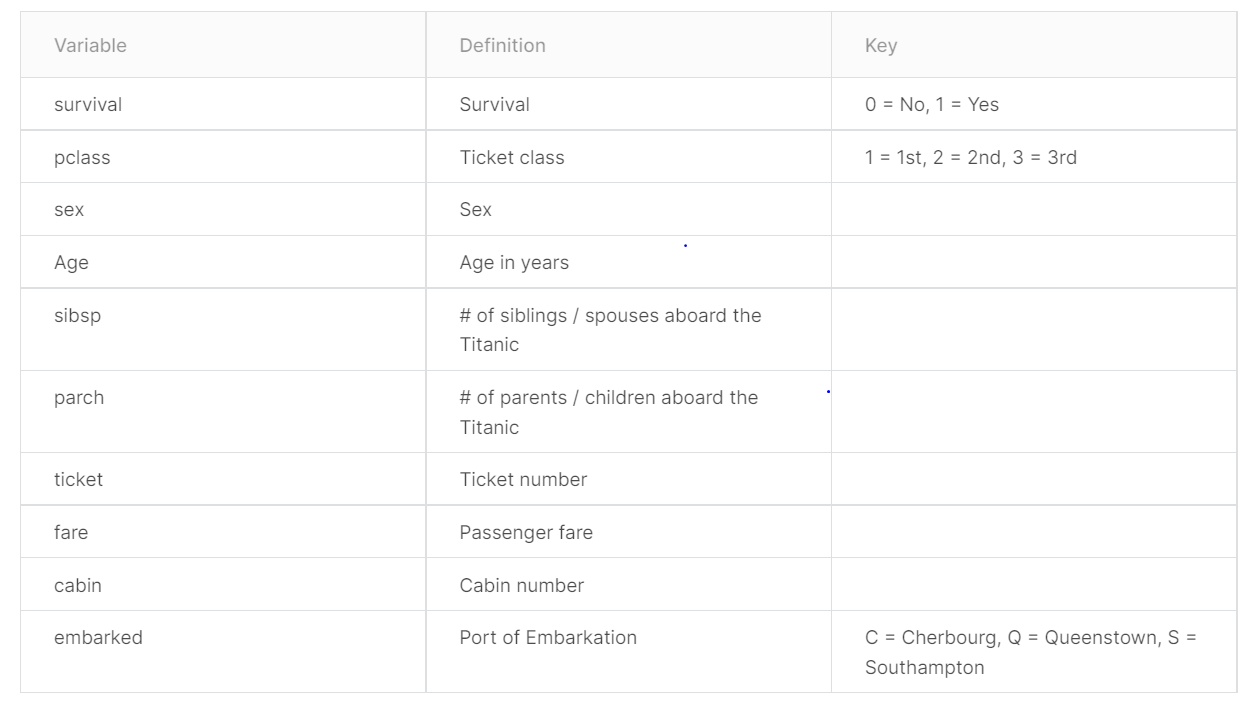

Entre las features disponibles disponemos de :  


*   Variables categoricas: Survived, Sex, and Embarked. Ordinal: Pclass.
*   Variables numéricas: Age, Fare. Discrete: SibSp, Parch.




####2.2. Importancia y objetivos de los análisis
A partir de este conjunto de datos se plantea la problemática de determinar qué variables
influyen más sobre la supervivenvia o no de las diferentes personas que estuvieron a bordo el trágico día del naufragio del titanic. Además, se podrá proceder a crear modelos
de clasificación  que permitan predecir la supervivencia o no de  tripulante en función de sus características .
Estos análisis adquieren una gran relevancia en casi cualquier sector el riesgo. Un ejemplo de ello se puede observar en el servicio de peritaje interno en
una compañía de seguros. En este caso, el perito, encargado de realizar informes
de riesgo que recogen la valoración del potencial nivel de riesgo al que exponga un asegurado, podría valerse de los análisis que
se plantean en esta actividad para utilizarlos como soporte a la hora de llevar a cabo las peritaciones.


####2.3. Limpieza de los datos
Antes de comenzar con la limpieza de los datos, procedemos a realizar la lectura del fichero
en formato CSV en el que se encuentran empleando pandas para ello. El resultado devuelto por la llamada a la función
read_csv():


In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#####2.3.1. Selección de los datos de interés
La gran mayoría de los atributos presentes en el conjunto de datos se corresponden con
características que definen a los pasajeros del Titanic, por lo que
será conveniente tenerlos en consideración durante la realización de los análisis. Sin embargo,
podemos prescindir de Ticket  debido a que contiene un alto valor de duplicados y es una mezca de valores numericos y alphanumericos. Adicionalmente Cabin tiene un alto ratio de valores perdidos tantos que no tiene sentido aplicar técnicas de imputación de valores perdidos.


In [ ]:
train_df = train_df.drop(['Ticket','Cabin'], axis=1)


#### 2.3.2. Ceros y elementos vacíos
Procedemos   a conocer a continuación qué campos contienen elementos vacíos:


In [ ]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Los valores perdidos en supervised no deberian preocuaparnos ya que se debe a que el confunto de test no dispone de labels . En cambio los de Age si que deberíamos procurar imputarlos de alguna manera.


In [ ]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [ ]:
for i in train_df.Title.unique():
  guess_df = train_df[(train_df['Title'] == i)]['Age'].dropna()
  age_guess = guess_df.median()
  train_df.loc[(train_df.Age.isnull()) &(train_df['Title'] == i),'Age']=age_guess

In [ ]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
freq_port = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)

Los imputamos utilizando la mediana de edad del grupo de personas con el mismo título. 

Como se puede comprar hemos resuelto todos los valores perdidos de nuestro dataset.

In [39]:
train_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

#### 2.3.3. Valores extremos
Los valores extremos o outliers son aquellos que parecen no ser congruentes sin los comparamos
con el resto de los datos. Para identificarlos, utilizarenmos los IQR fijaremos un valor máximo y minimo a una destancia de 1.5 IQR por encima y debajo de los quartiles del 25 y 75 de las variables Age y Fare.

In [42]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

out=['Age','Fare']
for i in out:
    q25,q75=np.percentile(train_df[i],[25,75])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
    train_df[i].iloc[train_df[train_df[i]<minimum].index]=minimum
    train_df[i].iloc[train_df[train_df[i]>maximum].index]=maximum

###2.4. Análisis de los datos
####2.4.1. Selección de los grupos de datos a analizar
A continuación,  decidiremos que analisis son reelvantes para llevarlos acabo.


 

*  Estudiar la influencia del **género** en la probabilidad de supervivencia  
*   Analizar si potencialmente la Pclass en la que viaja un pasajero tiene una influencia en sus posibilidad de sobrevivir a la catástrofe.










#### 2.4.2. Comprobación de la normalidad y homogeneidad de la varianza

Utilizando el test Anderson-Darling evaluaremos si existe normalidad en nuestras variables utilizando un contraste de hipótesis .


In [48]:
#train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
freq_port = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [50]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
eval=['Survived', 'Pclass','Sex' ,'Embarked']
for j in eval:
    data = train_df[j]
    # normality test
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
      sl, cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
      else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 171.363
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)
Statistic: 110.074
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)
Statistic: 178.570
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)
Statistic: 168.056
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look

Como podemos observar no se cuple la normalidad en nuestras variables categóricas.

### 2.5. Pruebas estadísticas
#### 2.5.1. ¿Qué variables cuantitativas influyen más en la supervivencia?
Utilizaremos un test estádistico de chi quadrado para ver que variables son predictoras de nuestra objetivo determinar la supervivencia.

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np


# Create features and target
X = train_df.drop(['Survived','Name'],axis=1)
y =  train_df.iloc[:,1]

# Convert to categorical data by converting data to integers
X = X.astype(int)

# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(X, y)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(train_df.columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
kbest = np.asarray(train_df.drop(['Survived','Name'],axis=1).columns)[chi2_selector.get_support()]
kbest

array(['Pclass', 'Sex', 'Age', 'Fare', 'Title'], dtype=object)

Utilizando nuestro test las 5 mejores variables son 'Pclass', 'Sex', 'Age', 'Fare', 'Title' , lo cual tiene sentido.

#### 2.5.2 ¿ Es diferente la probabilidad de supervivencia en función del sexo?

In [59]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.740385
0,0,0.188908


En este caso observamos que hay una clara diferencia en la probilidad de supervivencia en función del género una explicación plausible es que se evacuara primero a mujeres y niños , lo cual tiene sentido con lo esperado.

#### 2.5.3 ¿ La probabilidad de supervivencia  entre las difrentes clases de viajeros fue igual?

In [61]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


Podemos observar que viajar en primera o segunda clase era mejor para la supervivencia ya que se ve que la 3 clase estaban abajo en el titanic que fue lo primero que se inundó.

#### 2.5.4. Modelo de clasificación SVM
Tal y como se planteó en los objetivos de la actividad, sería importante poder clasificar en función de unas caracteristicas si un cliente tendría o no una incidencia . Así, se entrenará un modelo 
un modelo de supported vector machines utilizando es tanto cuantitativos como cualitativos con
el que poder clasificar la supervivencia de los pasajeros.

In [64]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
target_names = ['Non Survived', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non Survived       0.84      0.86      0.85       184
    Survived       0.75      0.72      0.73       110

    accuracy                           0.81       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.81      0.81       294



### Conclusión

Hemos trabajado la prepración y limpieza de los datos . Trabajando los valores perdidos y extremos. Se ha imputado de una forma inteligente los valores perdidos.
Y hemos tratado los valores extremos de una forma adecuada también. Hemos soportado alguna de las hipótesis planteadas reflejandolas en datos y por ultimo hemos entrenado un modeo de machine learning para poder clasificar a nuestros pasajeros del titanic:


### Bibiografía



1.   Gentle Introduction to Normality Tests in Python (internet)
2.   Chi-Squared For Feature Selection using SelectKBest (https://bhattbhavesh91.github.io/chi-square-feature-selection/)
3.  Pandas doc ( https://pandas.pydata.org/docs/)







In [66]:
train_df.to_csv('titanic_train.clean.csv')